# Lab 2 Assignments
### 1. Time two methods to add arrays
Creates two 100 x 100 arrays, then adds them together in two different ways: first by using a double for loop, and then by using the ‘+’ operator.

In [25]:

import numpy as np
import time

def loop_add(a_arr, b_arr):
    sum_arr = np.zeros((100,100))
    start_time = time.time()
    for i in range(100):
        for j in range(100):
            sum_arr[i, j] = a_arr[i, j] + b_arr[i, j]
    end_time = time.time()
    return (end_time - start_time)


def operator_add(a_arr, b_arr):
    start_time = time.time()
    result = a_arr + b_arr
    end_time = time.time()
    return (end_time - start_time)


a_arr = np.random.randint(0, 100,(100, 100))
b_arr = np.random.randint(0, 100,(100, 100))
print("Using nested for loops it took: " + str(loop_add(a_arr, b_arr)) + " s\n")
print("Using the '+' operator it took: " + str(operator_add(a_arr, b_arr)) + " s")

Using nested for loops it took: 0.005289316177368164 s

Using the '+' operator it took: 0.0 s


### 2. Record time 1000 times and plot as a histogram

Average time (double for loop): 4.316461801528931 ms
Standard deviation (double for loop): 5.299283368319937 ms
Average time ('+' operator): 0.010596275329589844 ms
Standard deviation ('+' operator): 0.3349160638273624 ms


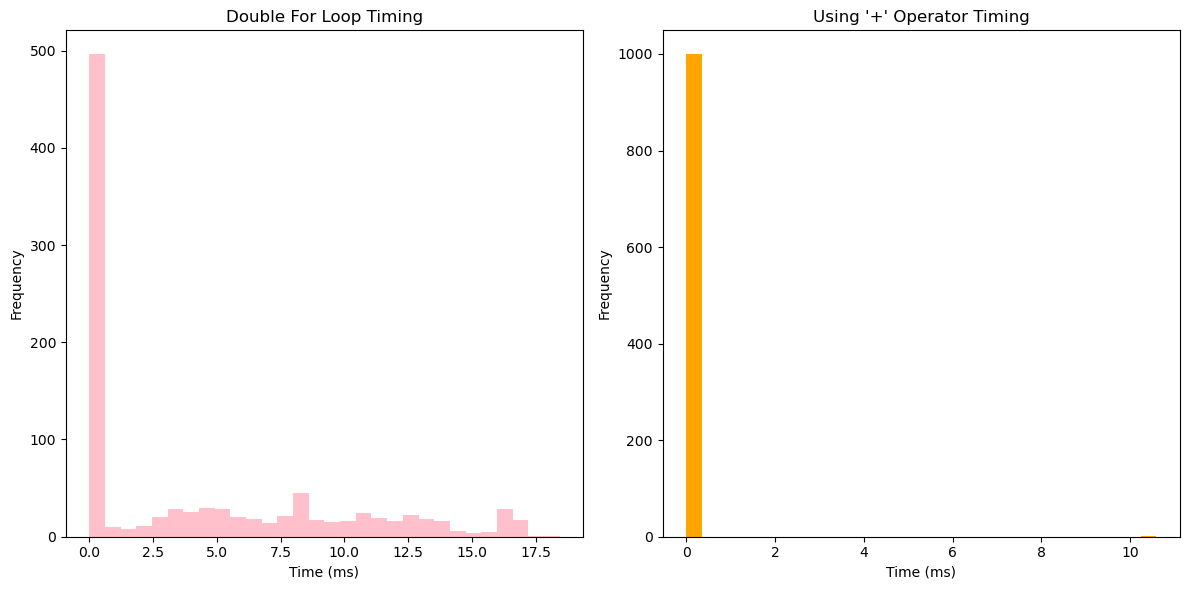

In [26]:
import numpy as np
import time
import matplotlib.pyplot as plt

def loop_add(a_arr, b_arr, iterations=1000):
    times = np.zeros(iterations)
    for k in range(iterations):
        sum_arr = np.zeros((100, 100))
        start_time = time.time()
        for i in range(100):
            for j in range(100):
                sum_arr[i, j] = a_arr[i, j] + b_arr[i, j]
        end_time = time.time()
        times[k] = (end_time - start_time) *1000
    return times

def operator_add(a_arr, b_arr, iterations=1000):
    times = np.zeros(iterations)
    for k in range(iterations):
        start_time = time.time()
        result = a_arr + b_arr
        end_time = time.time()
        times[k] = (end_time - start_time) * 1000
    return times

a_arr = np.random.randint(0, 100, (100, 100))
b_arr = np.random.randint(0, 100, (100, 100))

#time both methods
loop_times = loop_add(a_arr, b_arr)
operator_times = operator_add(a_arr, b_arr)

#calculate and print average and standard deviation
print(f"Average time (double for loop): {np.mean(loop_times)} ms")
print(f"Standard deviation (double for loop): {np.std(loop_times)} ms")
print(f"Average time ('+' operator): {np.mean(operator_times)} ms")
print(f"Standard deviation ('+' operator): {np.std(operator_times)} ms")


#plot histograms
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1) #adds an Axes to the current figure. nrows=1, ncols=2, index=1
plt.hist(loop_times, bins=30, color='pink')
plt.title('Double For Loop Timing')
plt.xlabel('Time (ms)')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(operator_times, bins=30, color='orange')
plt.title("Using '+' Operator Timing")
plt.xlabel('Time (ms)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### 3. My own program that uses NumPy and Matplotlib

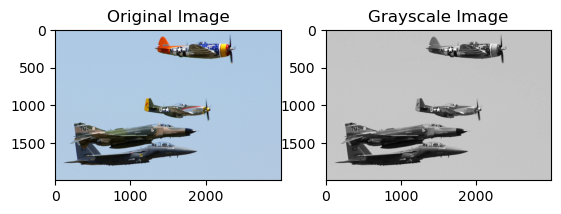

In [27]:
'''
This program utilizes PIL, NumPy, and Matplotlib to load and render image data. It also converts the image pixels into grayscale.

Links I used: 
 https://matplotlib.org/stable/tutorials/images.html#sphx-glr-tutorials-images-py
 https://saturncloud.io/blog/how-to-convert-an-image-to-grayscale-using-numpy-arrays-a-comprehensive-guide/#:~:text=In%20the%20world%20of%20data%20science,%20image%20processing%20is%20a

'''

from PIL import Image   #PIL (Python Imaging Library)
import numpy as np
import matplotlib.pyplot as plt

#Load an image using Pillow, a fork of PIL
img = Image.open('planes.jpg') #use Pillow to open an image
img_arr = np.asarray(img) #convert image into an 8-bit numpy array of RBG values
#print(repr(img_arr))

plt.subplot(1, 2, 1)
plt.imshow(img_arr) #use Matplotlib module imshow() to render the image
plt.title('Original Image')

plt.subplot(1, 2, 2)
#Dot product of the image array RGB values with specific weights converts it to grayscale
#[0.2989, 0.5870, 0.1140] is derived from human perception of different colors
#These weights make sure the grayscale image reflects brightness in a way that looks natural to human eyes
gray_img = np.dot(img_arr[..., :3], [0.2989, 0.5870, 0.1140])
plt.imshow(gray_img, cmap='gray') #cmap (colormap) maps scalar data to colors
plt.title('Grayscale Image')
plt.show()
